In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key
from pprint import pprint
import numpy as np
import json

In [2]:
from citipy import citipy

# List for Holding lat_lngs & Cities
lat_lngs = []
cities = []

# Create a Set of Random lat & lng Combinations
np.random.seed(42) # to show consistent result
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
lat_lngs = zip(lats, lngs)

# Identify Nearest City for Each lat, lng Combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the City is Unique, Then Add it to a Cities List
    if city not in cities:
        cities.append(city)
        
# Check the number of cities in the list
len(cities)

565

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#check the data layout to identify the list or dictionary to be used
weather = requests.get(query_url + city)
weather = weather.json()
pprint(weather)

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 40.6, 'lon': -124.16},
 'dt': 1603019794,
 'id': 5563839,
 'main': {'feels_like': 45.16,
          'humidity': 100,
          'pressure': 1018,
          'temp': 48.2,
          'temp_max': 48.2,
          'temp_min': 48.2},
 'name': 'Fortuna',
 'sys': {'country': 'US',
         'id': 4127,
         'sunrise': 1603031486,
         'sunset': 1603071093,
         'type': 1},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 140, 'speed': 4.7}}


In [4]:
#cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
city_name = []
country = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

#processing starting from 0
count = 1

# Loop through the list of cities and perform a request for data.
for city in cities:
    
#error handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        city_list = response['name']
        print(f"{count} : {city_list}")
        
        #loop to the next one
        count += 1
        
    except:
        print("Error in finding city")
        
    continue
    
print("Search Completed")

1 : Alofi
2 : Cherskiy
3 : Saint Paul Harbor
4 : Bilma
5 : Saint-Philippe
6 : New Norfolk
7 : Busselton
8 : Aykhal
9 : Saint-François
10 : Yuci
11 : Mataura
Error in finding city
12 : Enköping
13 : Albany
14 : Arraial do Cabo
Error in finding city
15 : Saldanha
16 : Hambantota
17 : Faanui
18 : Avarua
19 : Campeche
20 : Rikitea
21 : Port Lincoln
22 : Puerto Ayora
Error in finding city
23 : Saint-Augustin
24 : Mersing
25 : Salalah
26 : Hermanus
27 : Faya
28 : Souillac
29 : Punta Arenas
30 : Leningradskiy
31 : Pevek
32 : Verkhneyarkeyevo
Error in finding city
33 : Kapaa
Error in finding city
34 : George Town
35 : Hobart
36 : Dikson
37 : Ponta Delgada
38 : Minas
39 : Salinópolis
40 : Butaritari
41 : Tiksi
42 : Pavlivka
Error in finding city
Error in finding city
43 : Goundam
44 : Chui
45 : Ushuaia
46 : Durban
47 : Bowen
48 : Ancud
49 : Kologriv
50 : Atuona
51 : Ekhabi
52 : Qaanaaq
53 : Nikolskoye
54 : Edzell
55 : Poplar Bluff
56 : Vrangel'
57 : Dingle
58 : Irati
59 : Port Elizabeth
60 : No

480 : Mezen'
481 : Putineiu
482 : Ejido Ixcatepec
483 : Katsuura
484 : Kloulklubed
485 : Prince Rupert
486 : Bac Lieu
Error in finding city
487 : Manzhouli
488 : Fukuechō
489 : Merauke
490 : Cidreira
491 : Den Helder
492 : Kifrī
Error in finding city
493 : Shahdad Kot
494 : Pangoa
495 : Key Largo
496 : Banepā
497 : Port Hedland
498 : Turukhansk
499 : Talnakh
500 : Erzin
501 : Nehe
502 : Puksoozero
503 : Taoudenni
504 : Saint Anthony
505 : Lata
506 : Iquitos
507 : Gorom-Gorom
Error in finding city
508 : Yantzaza
509 : Wanning
510 : Ulladulla
Error in finding city
511 : Waitati
512 : Kaminokawa
513 : Natitingou
514 : Wanlaweyn
515 : Mongo
Error in finding city
516 : Andros Town
Search Completed


In [5]:
# Create a DataFrame
weather_df = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "longitude": lng,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Date":date,
}

weather_df = pd.DataFrame(weather_df)
weather_df.to_csv (r'C:\Users\TEHS\python-api-challenge\WeatherPy\Weather.csv', index = False, header=True)

#make sure it is still above 500
weather_df.count()

City           516
Country        516
Latitude       516
longitude      516
Temperature    516
Humidity       516
Cloudiness     516
Wind Speed     516
Date           516
dtype: int64

In [6]:
#display data frame
weather_df.head()

,City,Country,Latitude,longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Alofi,NU,-19.06,-169.92,78.80,94,84,6.93,1603019794
1,Cherskiy,RU,68.75,161.30,20.84,92,77,9.95,1603019794
2,Saint Paul Harbor,US,57.79,-152.41,37.40,81,75,3.36,1603019794
3,Bilma,NE,18.69,12.92,98.76,8,0,2.77,1603019794
4,Saint-Philippe,RE,-21.36,55.77,82.40,61,90,17.22,1603019794


# Temperature (F) vs. Latitude

The correlation between both factors is -0.58


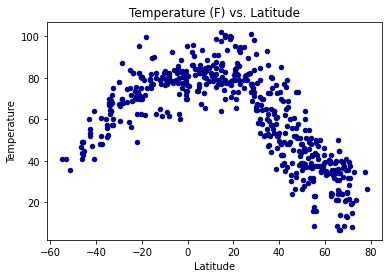

In [7]:
tempvslat = weather_df.plot.scatter(x='Latitude',
                                    y='Temperature',
                                    c='DarkBlue')
plt.title('Temperature (F) vs. Latitude')
x = weather_df['Latitude']
y = weather_df['Temperature']
correlation = stats.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('tempvslat.png')

 The plot shows strong, non linear relationship between temperature and latitude.
 At zero latitude, we can see the temperature is higer, as the latitude increases, the temperature drop. 

# Humidity (%) vs. Latitude

The correlation between both factors is 0.08


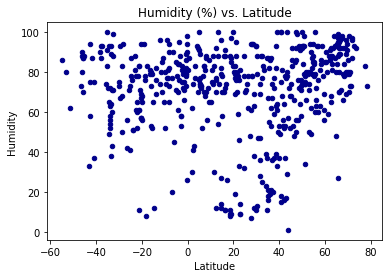

In [8]:
humvslat = weather_df.plot.scatter(x='Latitude',
                                    y='Humidity',
                                    c='DarkBlue')
plt.title('Humidity (%) vs. Latitude')
x = weather_df['Latitude']
y = weather_df['Humidity']
correlation = stats.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('humidityvslat.png')

The plot shows low positive correlation between humidity vs latitude. 
As the latitude increases, the humidity increases

# Cloudiness (%) vs. Latitude

The correlation between both factors is 0.02


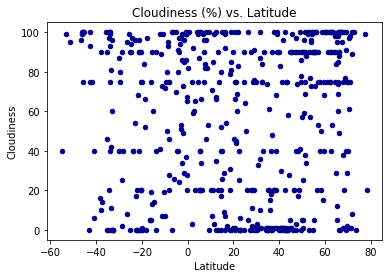

In [9]:
humvslat = weather_df.plot.scatter(x='Latitude',
                                    y='Cloudiness',
                                    c='DarkBlue')
plt.title('Cloudiness (%) vs. Latitude')
x = weather_df['Latitude']
y = weather_df['Cloudiness']
correlation = stats.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Cloudinessvslat.png')

The plot shows very weak correlation between cloudiness and latitude as the plot is scatter widely across the latitude

# Wind Speed (mph) vs. Latitude

The correlation between both factors is 0.03


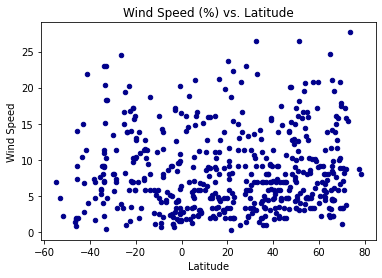

In [10]:
humvslat = weather_df.plot.scatter(x='Latitude',
                                    y='Wind Speed',
                                    c='DarkBlue')
plt.title('Wind Speed (%) vs. Latitude')
x = weather_df['Latitude']
y = weather_df['Wind Speed']
correlation = stats.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('WindSpeedvslat.png')

The plot shows very weak correlation between wind speed and latitude as the plot is scatter widely across the latitude

# Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude)

In [11]:
#Northern and Southern Hemisphere 
northern_df = weather_df.loc[weather_df["Latitude"] >= 0]
southern_df = weather_df.loc[weather_df["Latitude"] < 0]

# Northern Hemisphere - Temperature (F) vs. Latitude

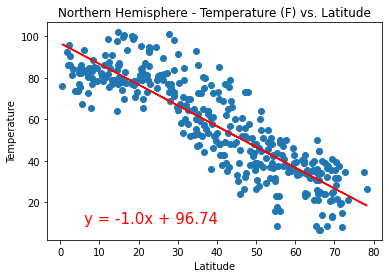

The r-squared is: 0.761275624424095


In [12]:
from scipy.stats import linregress
#linear regression
x_values = northern_df['Latitude']
y_values = northern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.savefig('Nothern-TempvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows strong negative linear relationship between temperatarure and latitude in Northern Hemisphere. 

# Southern Hemisphere - Temperature (F) vs. Latitude

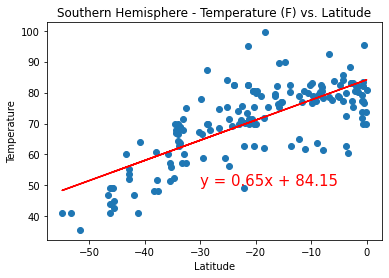

The r-squared is: 0.549504486222731


In [13]:
#linear regression
x_values = southern_df['Latitude']
y_values = southern_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.savefig('Southern-TempvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows moderate positive linear relationship between temperatarure and latitude in Southern Hemisphere.

# Northern Hemisphere - Humidity (%) vs. Latitude

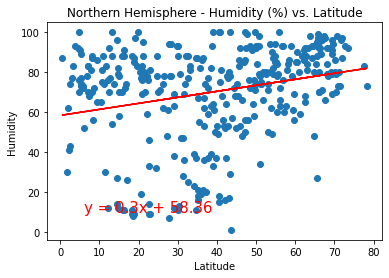

The r-squared is: 0.06675884264247124


In [14]:
#linear regression
x_values = northern_df['Latitude']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Nothern-HumidityvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows very weak linear relationship between humidity and latitude in Northern Hemisphere.

# Southern Hemisphere - Humidity (%) vs. Latitude

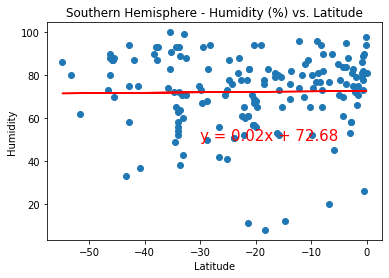

The r-squared is: 0.00029772058871751567


In [15]:
#linear regression
x_values = southern_df['Latitude']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('Southern-HumidityvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows very weak relationship between humidity and latitude in Southern Hemisphere.

# Northern Hemisphere - Cloudiness (%) vs. Latitude

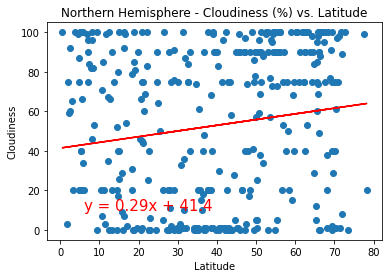

The r-squared is: 0.02340614299420051


In [16]:
#linear regression
x_values = northern_df['Latitude']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Nothern-CloudinessvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows no relationship between cloudiness and latitude in Northern Hemisphere.

# Southern Hemisphere - Cloudiness (%) vs. Latitude


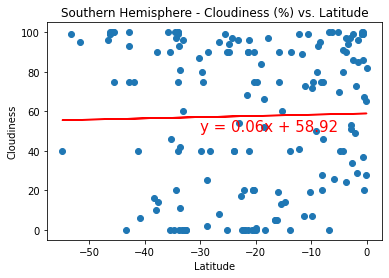

The r-squared is: 0.0005762418229735593


In [17]:
#linear regression
x_values = southern_df['Latitude']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('Southern-CloudinessvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows no relationship between cloudiness and latitude in Southern Hemisphere.

# Northern Hemisphere - Wind Speed (mph) vs. Latitude

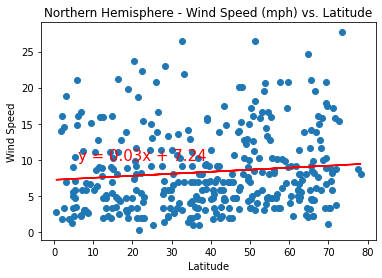

The r-squared is: 0.01073855749634062


In [18]:
#linear regression
x_values = northern_df['Latitude']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig('Nothern-WindSpeedvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows no relationship between wind speed and latitude in Northern Hemisphere.

# Southern Hemisphere - Wind Speed (mph) vs. Latitude

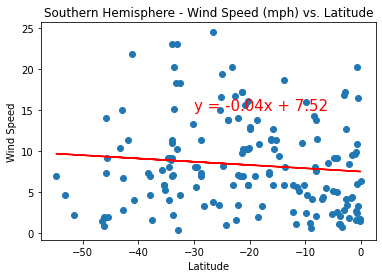

The r-squared is: 0.010620690984987148


In [19]:
#linear regression
x_values = southern_df['Latitude']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig('Southern-WindSpeedvsLat.png')
plt.show()
print(f"The r-squared is: {rvalue**2}")

The plot shows no relationship between wind speed and latitude in Southern Hemisphere.